In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

# Problem Statement

## Create a model for detecting Diabetes.

In [17]:
df = pd.read_csv("diabetes.csv")

In [18]:
df.head(8)

In [112]:
df.shape

(768, 9)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [114]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.062500,19.261090,0.000,62.00000,72.0000,80.00000,107.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,71.752604,88.872064,0.000,0.00000,30.5000,127.25000,280.00
BMI,768.0,31.933854,7.707488,0.000,27.30000,32.0000,36.60000,50.55
DiabetesPedigreeFunction,768.0,0.458914,0.285596,0.078,0.24375,0.3725,0.62625,1.20
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Feature Engineering

### Checking for null values

In [22]:
df.isnull().sum()

#### As per the paper readings with value 0 indicate missing values

In [23]:
df[df["Glucose"]==0]

In [24]:
df[df["BloodPressure"]==0]

In [25]:
df[(df["Insulin"]==0) & (df["Outcome"]==0)]  #As insulin with value 0 guarantees diabetes the others will be missing values

In [26]:
df[df["BMI"]==0]

In [27]:
df[df["SkinThickness"]==0]

### Checking whether the target class is balanced or not

In [28]:
df["Outcome"].value_counts()

In [29]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="Outcome",data=df)
plot.set_xticklabels(["Non-Diabetic","Diabetic"])

#### Seems to be fine

## Performing EDA using Panda Profiling

In [30]:
prof_report = pandas_profiling.ProfileReport(df , title = 'Diabetes Prediction')
prof_report.to_widgets()

## Feature Engineering

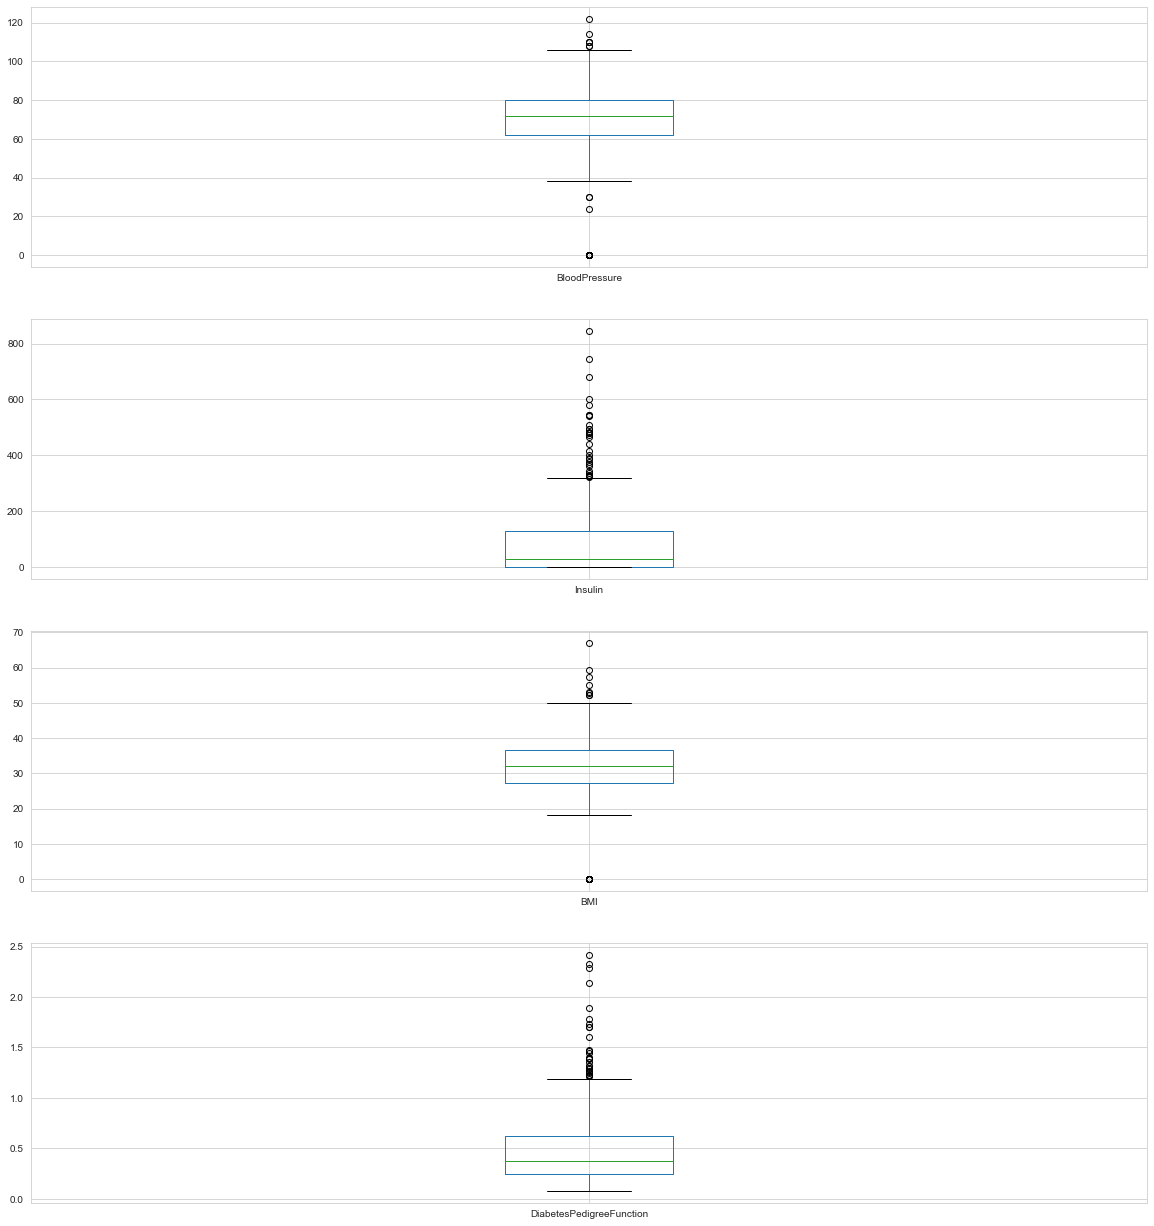

In [31]:
fig, axes = plt.subplots(4,1, sharex=False, figsize=(20,22))
df.boxplot(ax=axes[0],column='BloodPressure')
df.boxplot(ax=axes[1],column='Insulin')
df.boxplot(ax=axes[2],column='BMI')
df.boxplot(ax=axes[3],column='DiabetesPedigreeFunction')

In [32]:
IQR=df.BloodPressure.quantile(0.75)-df.BloodPressure.quantile(0.25)
upper_bridge=df['BloodPressure'].quantile(0.75)+(IQR*1.5)
# print(upper_bridge)
indices=df[df['BloodPressure']>upper_bridge].index
for i in indices.tolist():
    df['BloodPressure'][i]=upper_bridge

In [33]:
IQR=df.Insulin.quantile(0.75)-df.Insulin.quantile(0.25)
upper_bridge=df['Insulin'].quantile(0.75)+(IQR*1.5)
#print(upper_bridge)
indices=df[df['Insulin']>280].index
for i in indices.tolist():
    df['Insulin'][i]=280

318.125


#### Since there are many missing values(0) , the upper bridge is getting overestimated because of many 0's

In [34]:
IQR=df.BMI.quantile(0.75)-df.BMI.quantile(0.25)
upper_bridge=df['BMI'].quantile(0.75)+(IQR*1.5)
# print(upper_bridge)
indices=df[df['BMI']>upper_bridge].index
for i in indices.tolist():
    df['BMI'][i]=upper_bridge

In [35]:
IQR=df.DiabetesPedigreeFunction.quantile(0.75)-df.DiabetesPedigreeFunction.quantile(0.25)
upper_bridge=df['DiabetesPedigreeFunction'].quantile(0.75)+(IQR*1.5)
# print(upper_bridge)
indices=df[df['DiabetesPedigreeFunction']>upper_bridge].index
for i in indices.tolist():
    df['DiabetesPedigreeFunction'][i]=upper_bridge

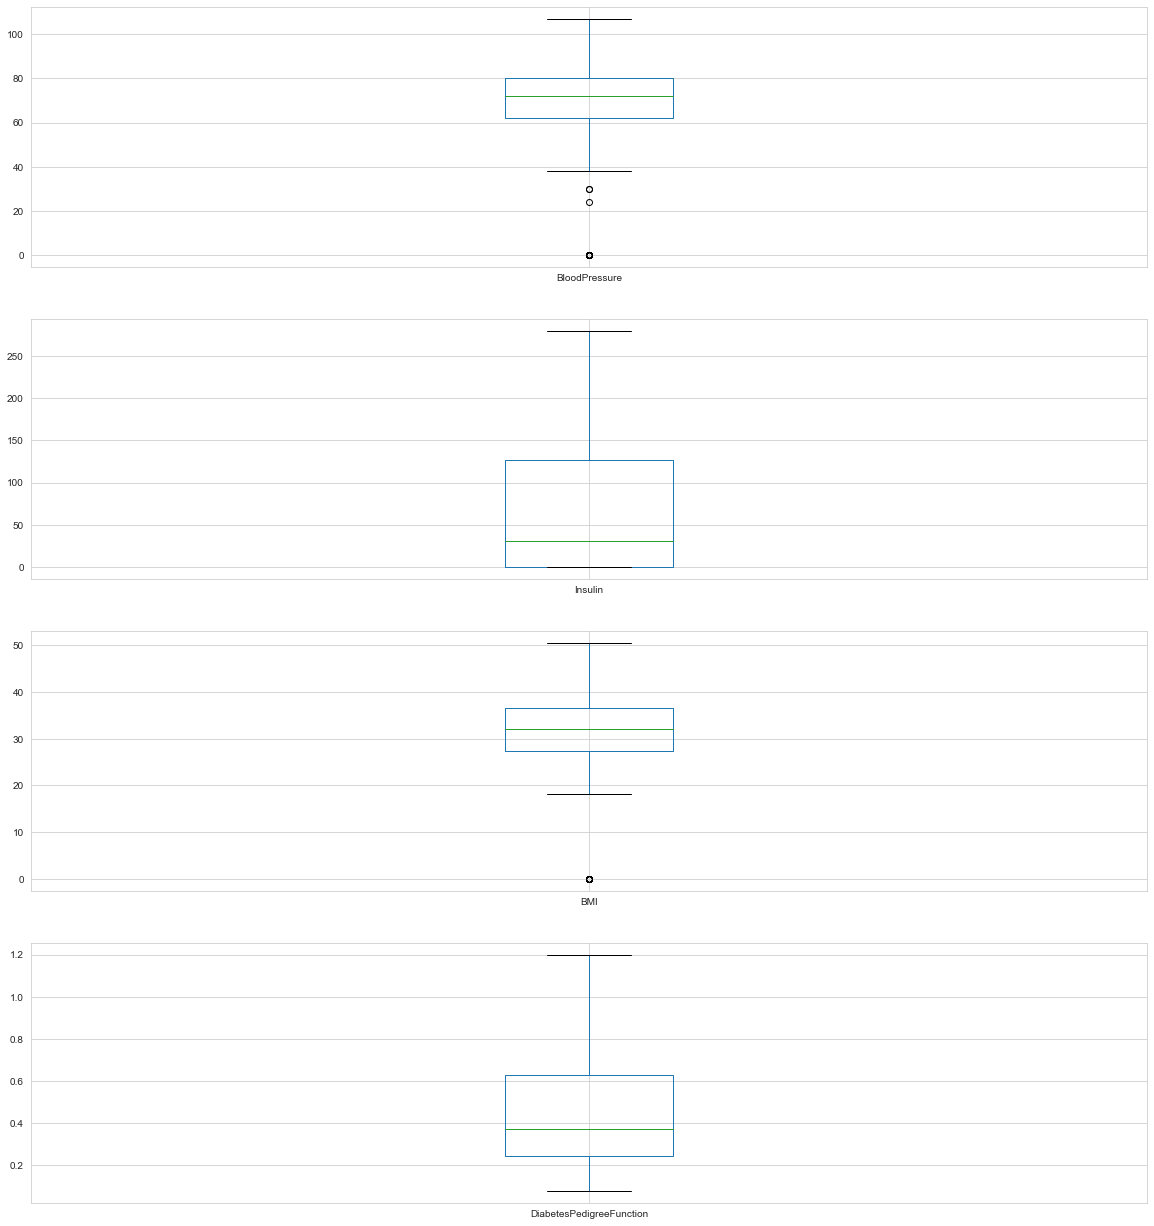

In [36]:
fig, axes = plt.subplots(4,1, sharex=False, figsize=(20,22))
df.boxplot(ax=axes[0],column='BloodPressure')
df.boxplot(ax=axes[1],column='Insulin')
df.boxplot(ax=axes[2],column='BMI')
df.boxplot(ax=axes[3],column='DiabetesPedigreeFunction')

## Feature Selection

#### Using Heatmap

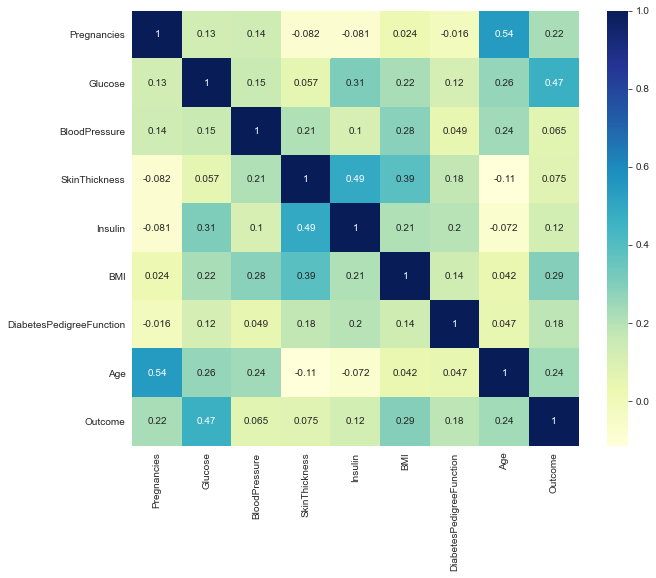

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [296]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [297]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [298]:
y=df["Outcome"]

In [299]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [300]:
print(model.feature_importances_)

[0.11108526 0.23165457 0.10194461 0.0801869  0.07682555 0.14342311
 0.11884056 0.13603944]


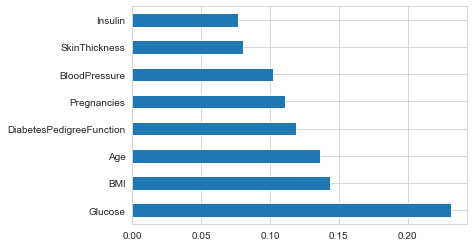

In [301]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [303]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [304]:
y=df["Outcome"]

## Model Selection

Here we will be experimenting with 3 algorithms 
1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier
4. XG Boost Classifier
5. SVM Classifier
6. Logistic Regression
7. Artificial Neural Network

## Feature Selection

In [305]:
from sklearn.model_selection import train_test_split

In [306]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)

In [307]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [308]:
glucose_mean=x_train['Glucose'].mean()
x_train['Glucose']=x_train['Glucose'].replace({0:glucose_mean})
x_test['Glucose']=x_test['Glucose'].replace({0:glucose_mean})

In [309]:
bp_mean=x_train["BloodPressure"].mean()
x_train["BloodPressure"]=x_train["BloodPressure"].replace({0:bp_mean})
x_test["BloodPressure"]=x_test["BloodPressure"].replace({0:bp_mean})

In [310]:
insulin_median=x_train['Insulin'].median()
x_train['Insulin']=x_train['Insulin'].replace({0:insulin_median})
x_test['Insulin']=x_test['Insulin'].replace({0:insulin_median})

In [311]:
BMI_mean=x_train['BMI'].mean()
x_train['BMI']=x_train['BMI'].replace({0:BMI_mean})
x_test['BMI']=x_test['BMI'].replace({0:BMI_mean})

### K Neighbors Classifier

In [151]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [96]:
#Run split data cell

In [312]:
standardScaler = StandardScaler()

x_train = standardScaler.fit_transform(x_train)

x_test= standardScaler.transform(x_test)

In [75]:
knn_scores = []
for k in range(1,50):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
    knn_scores.append(score.mean())

In [76]:
knn_scores

[0.6997277676950998,
 0.6875680580762251,
 0.7032365396249244,
 0.737749546279492,
 0.7238354506957048,
 0.7463097398669087,
 0.7169388989715668,
 0.7376890502117363,
 0.7204476709013914,
 0.7237749546279492,
 0.7325771324863883,
 0.7307320024198427,
 0.7325166364186327,
 0.7392619479733817,
 0.7445856019358743,
 0.7463399879007866,
 0.7515728977616456,
 0.7515426497277679,
 0.7620387174833636,
 0.7480943738656988,
 0.763762855414398,
 0.7568058076225046,
 0.7690562613430127,
 0.7566848154869932,
 0.7603145795523291,
 0.7533877797943134,
 0.7637931034482758,
 0.7499092558983665,
 0.7568360556563822,
 0.7498790078644888,
 0.75686630369026,
 0.7550514216575922,
 0.7585601935874168,
 0.7463097398669086,
 0.7568058076225046,
 0.7551421657592257,
 0.7533877797943134,
 0.7412885662431942,
 0.7395341802782819,
 0.7447065940713854,
 0.7463702359346643,
 0.7446763460375077,
 0.7498790078644888,
 0.7411978221415609,
 0.7411978221415608,
 0.7429219600725954,
 0.7481548699334544,
 0.74295220810647

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

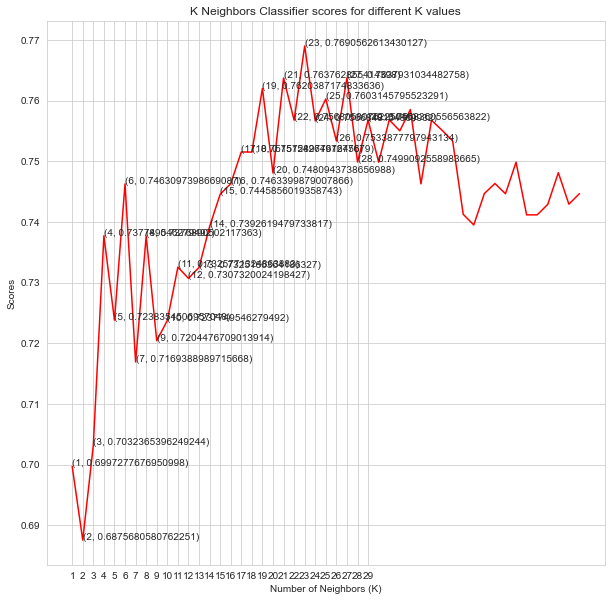

In [78]:
plt.figure(figsize=(10,10))
plt.plot([k for k in range(1, 50)], knn_scores, color = 'red')
for i in range(1,30):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 30)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [79]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [80]:
error_rate

[0.28125,
 0.2760416666666667,
 0.22395833333333334,
 0.24479166666666666,
 0.234375,
 0.24479166666666666,
 0.23958333333333334,
 0.23958333333333334,
 0.22916666666666666,
 0.24479166666666666,
 0.203125,
 0.234375,
 0.20833333333333334,
 0.22916666666666666,
 0.19791666666666666,
 0.203125,
 0.203125,
 0.234375,
 0.21354166666666666,
 0.22916666666666666,
 0.20833333333333334,
 0.23958333333333334,
 0.22395833333333334,
 0.21354166666666666,
 0.21875,
 0.22395833333333334,
 0.21875,
 0.24479166666666666,
 0.234375,
 0.22916666666666666,
 0.22916666666666666,
 0.234375,
 0.22916666666666666,
 0.234375,
 0.22395833333333334,
 0.23958333333333334,
 0.24479166666666666,
 0.24479166666666666,
 0.24479166666666666,
 0.23958333333333334,
 0.234375,
 0.234375,
 0.24479166666666666,
 0.234375,
 0.234375,
 0.234375,
 0.22916666666666666,
 0.234375,
 0.234375]

Text(0.5, 1.0, 'Error rate for different K values')

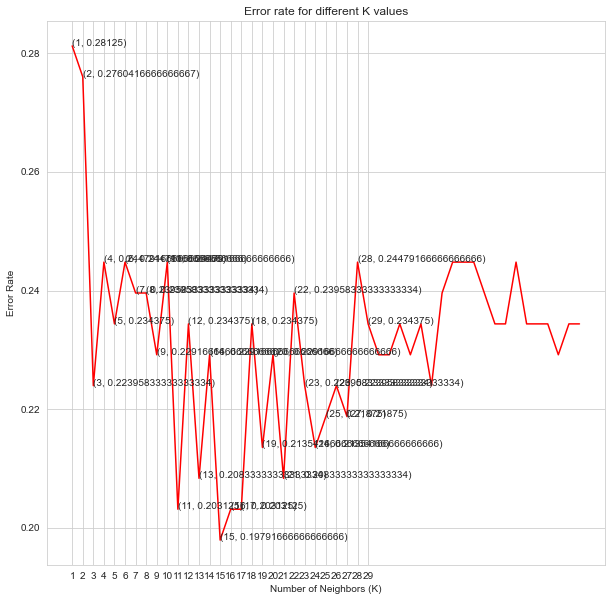

In [82]:
plt.figure(figsize=(10,10))
plt.plot([k for k in range(1, 50)],error_rate, color = 'red')
for i in range(1,30):
    plt.text(i, error_rate[i-1], (i, error_rate[i-1]))
plt.xticks([i for i in range(1, 30)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.title('Error rate for different K values')

#### k=15 could be an ideal choice as it gives less error rate and more accuracy

In [83]:
knnclassifier = KNeighborsClassifier(n_neighbors=15)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.8020833333333334

In [84]:
print(confusion_matrix(y_test,y_pred))

[[110  14]
 [ 24  44]]


In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       124
           1       0.76      0.65      0.70        68

    accuracy                           0.80       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.80      0.80       192



### Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Run the split cell above

In [99]:
clf = DecisionTreeClassifier(random_state=101)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=101)

In [100]:
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7291666666666666

In [101]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [102]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07840209391386921


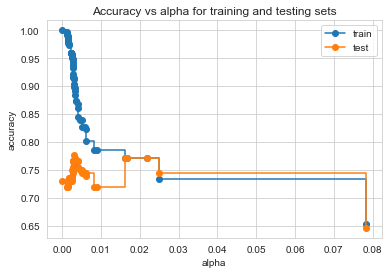

In [103]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [106]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.018)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.018, random_state=0)

In [107]:
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7708333333333334

In [108]:
print(confusion_matrix(y_test,pred))

[[109  15]
 [ 29  39]]


In [109]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       124
           1       0.72      0.57      0.64        68

    accuracy                           0.77       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192



### RandomForestClassifier

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)     #Utilizes all the cores of the CPU
rf_p_dist={'max_depth':[3,5,10,15,None],    #None means till full depth
              'n_estimators':[10,15,20,30,40,50,80,100],   # Number of Decision Trees
              'max_features':randint(1,9),   # AS I have 10 features
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,6),
              }

In [174]:
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):   #p_distr is the different set of parameters
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=5)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [175]:
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 15, x, y)

In [176]:
rf_parameters

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 6,
 'min_samples_leaf': 4,
 'n_estimators': 100}

In [177]:
rf_ht_score

0.7735166793990323

In [178]:
classifier=RandomForestClassifier(n_jobs=-1, n_estimators=100,bootstrap= True,criterion='entropy',max_depth=5,max_features=1,min_samples_leaf=4)

In [179]:
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=1,
                       min_samples_leaf=4, n_jobs=-1)

In [180]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy_score)

[[113  11]
 [ 33  35]]
0.7708333333333334


In [181]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       124
           1       0.76      0.51      0.61        68

    accuracy                           0.77       192
   macro avg       0.77      0.71      0.73       192
weighted avg       0.77      0.77      0.76       192



### XG Boost

In [182]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [183]:
classifier=xgboost.XGBClassifier()

In [185]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [186]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [187]:
#Run split cell

In [188]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[13:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [189]:
classifier=xgboost.XGBClassifier(max_depth=None,subsample=None,n_estimators=100,learning_rate=None,min_child_weight=None, random_state=None,reg_alpha=None, reg_lambda=None)

In [190]:
classifier.fit(x_train, y_train)

[13:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [191]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy_score)

[[102  22]
 [ 19  49]]
0.7864583333333334


In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       124
           1       0.69      0.72      0.71        68

    accuracy                           0.79       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.79      0.79      0.79       192



### Logisitic Regression

In [204]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [205]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x,y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.775142 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.774710 (0.040710) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.775142 (0.040824) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.774704 (0.041726) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.775142 (0.040270) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.774710 (0.039731) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.772528 (0.042512) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.772539 (0.041352) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.772106 (0.040800) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.770802 (0.039952) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.767766 (0.042779) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.768199 (0.041898) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.734313 (0.035375) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.764724 (0.044350) with

In [383]:
#Run the split cell

In [251]:
logisticRegr = LogisticRegression(C=0.01,penalty="l2",solver='lbfgs')

In [252]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=0.01)

In [253]:
predictions = logisticRegr.predict(x_test)

In [254]:
cm=confusion_matrix(y_test, predictions)
print(cm)

[[108  16]
 [ 29  39]]


In [255]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       124
           1       0.71      0.57      0.63        68

    accuracy                           0.77       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192



### SVM

In [256]:
from sklearn.svm import SVC
model = SVC()

In [257]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [258]:
from sklearn.model_selection import GridSearchCV

In [259]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [260]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.655 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.655 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.655 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [291]:
model=SVC(C=1000,gamma=0.0001,kernel="rbf")

In [292]:
model.fit(x_train,y_train)

SVC(C=1000, gamma=0.0001)

In [293]:
predictions = model.predict(x_test)

In [294]:
print(confusion_matrix(y_test,predictions))

[[99 25]
 [22 46]]


In [295]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       124
           1       0.65      0.68      0.66        68

    accuracy                           0.76       192
   macro avg       0.73      0.74      0.74       192
weighted avg       0.76      0.76      0.76       192



### Artificial Neural Networks

In [340]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping

In [390]:
model =Sequential()


model.add(Dense(60,activation="relu"))
model.add(Dropout(0.7))
model.add(Dense(40,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(30,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.5))





#Binary classification
model.add(Dense(1,activation="sigmoid"))
adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name="SGD")

In [391]:
import tensorflow
from IPython.display import clear_output
class PlotLearning(tensorflow.keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [392]:
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=10)

In [393]:
model.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])

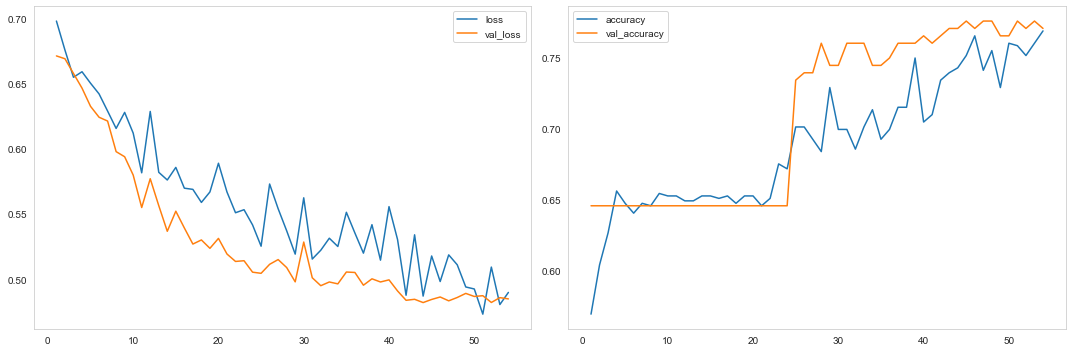

Epoch 00054: early stopping


In [394]:
model.fit(x=x_train,y=y_train,epochs=100,validation_data=(x_test,y_test),callbacks=[early_stop,PlotLearning()],batch_size=3)

In [397]:
predictions=model.predict_classes(x_test)

In [398]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81       124
           1       0.64      0.82      0.72        68

    accuracy                           0.77       192
   macro avg       0.76      0.78      0.76       192
weighted avg       0.80      0.77      0.78       192



In [359]:
model.save("bsize3-acc76rec0-85-1-71.h5")